In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat
from scipy.fftpack import fft, fftfreq, fftshift

In [2]:
df=pd.read_csv("Bar_Harbor_2.csv", parse_dates=['Date Time'], header=int(0))

In [3]:
df.columns= ['Date Time', 'Water Level', 'Sigma', 'I', 'L']

In [4]:
df.dtypes

Date Time      datetime64[ns]
Water Level           float64
Sigma                 float64
I                       int64
L                       int64
dtype: object

In [5]:
df=df.drop(['Sigma', 'I', 'L'],axis=1)

In [6]:
df

,Date Time,Water Level
0,2016-01-01 00:00:00,1.126
1,2016-01-01 01:00:00,0.600
2,2016-01-01 02:00:00,0.364
3,2016-01-01 03:00:00,0.443
4,2016-01-01 04:00:00,0.897
5,2016-01-01 05:00:00,1.555
6,2016-01-01 06:00:00,2.293
7,2016-01-01 07:00:00,2.854
8,2016-01-01 08:00:00,3.158
9,2016-01-01 09:00:00,3.161


In [7]:
df1= df.loc[abs(df['Water Level']) < 0.09]

In [8]:
df1.head(100)

,Date Time,Water Level
213,2016-01-09 21:00:00,0.041
262,2016-01-11 22:00:00,-0.087
275,2016-01-12 11:00:00,0.011
287,2016-01-12 23:00:00,-0.026
288,2016-01-13 00:00:00,0.027
311,2016-01-13 23:00:00,-0.055
324,2016-01-14 12:00:00,-0.028
325,2016-01-14 13:00:00,-0.028
336,2016-01-15 00:00:00,0.064
338,2016-01-15 02:00:00,0.066


In [9]:
z = np.arange(0.0, 1440.0, 1.0)

In [10]:
df['Hora'] =  pd.Series(z, index =None)

In [11]:
df.head()

,Date Time,Water Level,Hora
0,2016-01-01 00:00:00,1.126,0.0
1,2016-01-01 01:00:00,0.600,1.0
2,2016-01-01 02:00:00,0.364,2.0
3,2016-01-01 03:00:00,0.443,3.0
4,2016-01-01 04:00:00,0.897,4.0


In [14]:
a = np.absolute(yf)/N
a

array([  1.80362569e+00,   1.70436759e-02,   1.49023104e-02, ...,
         1.18533057e-03,   1.49023104e-02,   1.70436759e-02])

In [15]:
print(np.where(a[:,]>0.045))
b= a[a[:,]>0.045]
b

(array([   0,   60,  114,  115,  116,  118,  120, 1320, 1322, 1324, 1325,
       1326, 1380]),)


array([ 1.80362569,  0.06320611,  0.14515994,  0.08528659,  0.7979768 ,
        0.04644003,  0.12942897,  0.12942897,  0.04644003,  0.7979768 ,
        0.08528659,  0.14515994,  0.06320611])

In [16]:
print( 'Primer Armónico notorio')
print('Amplitud=',np.absolute(yf[0,]/N))
print('frecuencia=', xf[int(720 +0),])
print('periodo', 1/xf[int(720+0),])

print()
print( 'Segundo Armónico notorio')
print('Amplitud=',np.absolute(yf[60,]/N))
print('frecuencia=', xf[int(720 +60),])
print('periodo', 1/xf[int(720+60),])

print()
print('Tercer Armónico notorio')
print('Amplitud=',np.absolute(yf[114,]/N))
print('frecuencia=', xf[int(720 +114),])
print('periodo', 1/xf[int(720 +114),])

print()
print('Cuarto armónico notorio')
print('Amplitud=',np.absolute(yf[116,]/N))
print('frecuencia=', xf[int(720 +116),])
print('periodo', 1/xf[int(720 +116),])

print()
print('Quinto armónico notorio')
print('Amplitud=',np.absolute(yf[118,]/N))
print('frecuencia=', xf[int(720 +118),])
print('periodo', 1/xf[int(720 +118),])

print()
print('Sexto Armónico notorio')
print('Amplitud=',np.absolute(yf[120,]/N))
print('frecuencia=', xf[int(720 +120),])
print('periodo', 1/xf[int(720 +120),])

Primer Armónico notorio
Amplitud= 1.80362569444
frecuencia= 0.0
periodo inf

Segundo Armónico notorio
Amplitud= 0.0632061063292
frecuencia= 0.0416666666667
periodo 24.0

Tercer Armónico notorio
Amplitud= 0.145159940457
frecuencia= 0.0791666666667
periodo 12.6315789474

Cuarto armónico notorio
Amplitud= 0.797976796367
frecuencia= 0.0805555555556
periodo 12.4137931034

Quinto armónico notorio
Amplitud= 0.0464400282825
frecuencia= 0.0819444444444
periodo 12.2033898305

Sexto Armónico notorio
Amplitud= 0.129428968618
frecuencia= 0.0833333333333
periodo 12.0


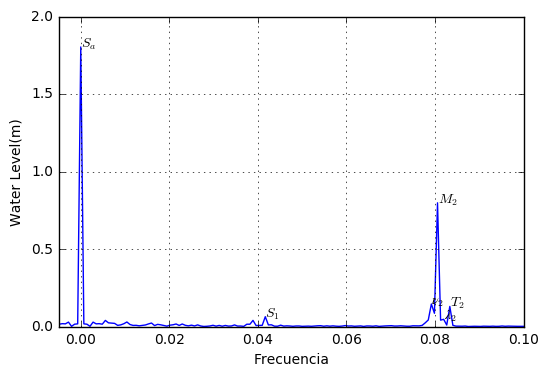

In [13]:
N = 1440
T = 1
x = df['Date Time']
y = df['Water Level']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.005,0.1)
plt.xlabel('Frecuencia')
plt.ylabel('Water Level(m)')
plt.text(0.0, 1.80362569444,'$S_a$')
plt.text(0.0416666666667, 0.0632061063292,'$S_1$')
plt.text(0.0791666666667, 0.145159940457,'$ν_2$')
plt.text(0.0805555555556, 0.797976796367,'$M_2$') 
plt.text(0.0819444444444, 0.0464400282825,'$λ_2$')
plt.text(0.0833333333333, 0.129428968618,'$T_2$') 
plt.grid()
plt.show()

In [17]:
#Amplitud
Sa = np.absolute(yf[0,]/N)
S1 = np.absolute(yf[60,]/N)
ν2 = np.absolute(yf[114,]/N)
M2 = np.absolute(yf[116,]/N)
λ2 = np.absolute(yf[118,]/N)
T2 = np.absolute(yf[120,]/N)

#Frecuencia
f_Sa = xf[int(720 +0)]
f_S1 = xf[int(720 +60),]
f_ν2 = xf[int(720 +114),]
f_M2 = xf[int(720 +116),]
f_λ2 = xf[int(720 +118)]
f_T2 = xf[int(720 +120),]

#Fase
QSa = np.angle(yf[int(0),])
QS1 = np.angle(yf[int(60),])
Qν2 = np.angle(yf[int(114),])
QM2 = np.angle(yf[int(116),])
Qλ2 = np.angle(yf[int(118),])
QT2 = np.angle(yf[int(120),])

In [18]:
w= 2.0*np.pi
a = 0
def f(t):
    return Sa + 2*(S1*np.cos(w*f_S1*t+QS1) + ν2*np.cos(w *f_ν2 *t+Qν2) + M2*np.cos(w*f_M2*t+QM2) + λ2*np.cos(w*f_λ2*t+Qλ2) + T2*np.cos(w*f_T2*t+QT2))
 

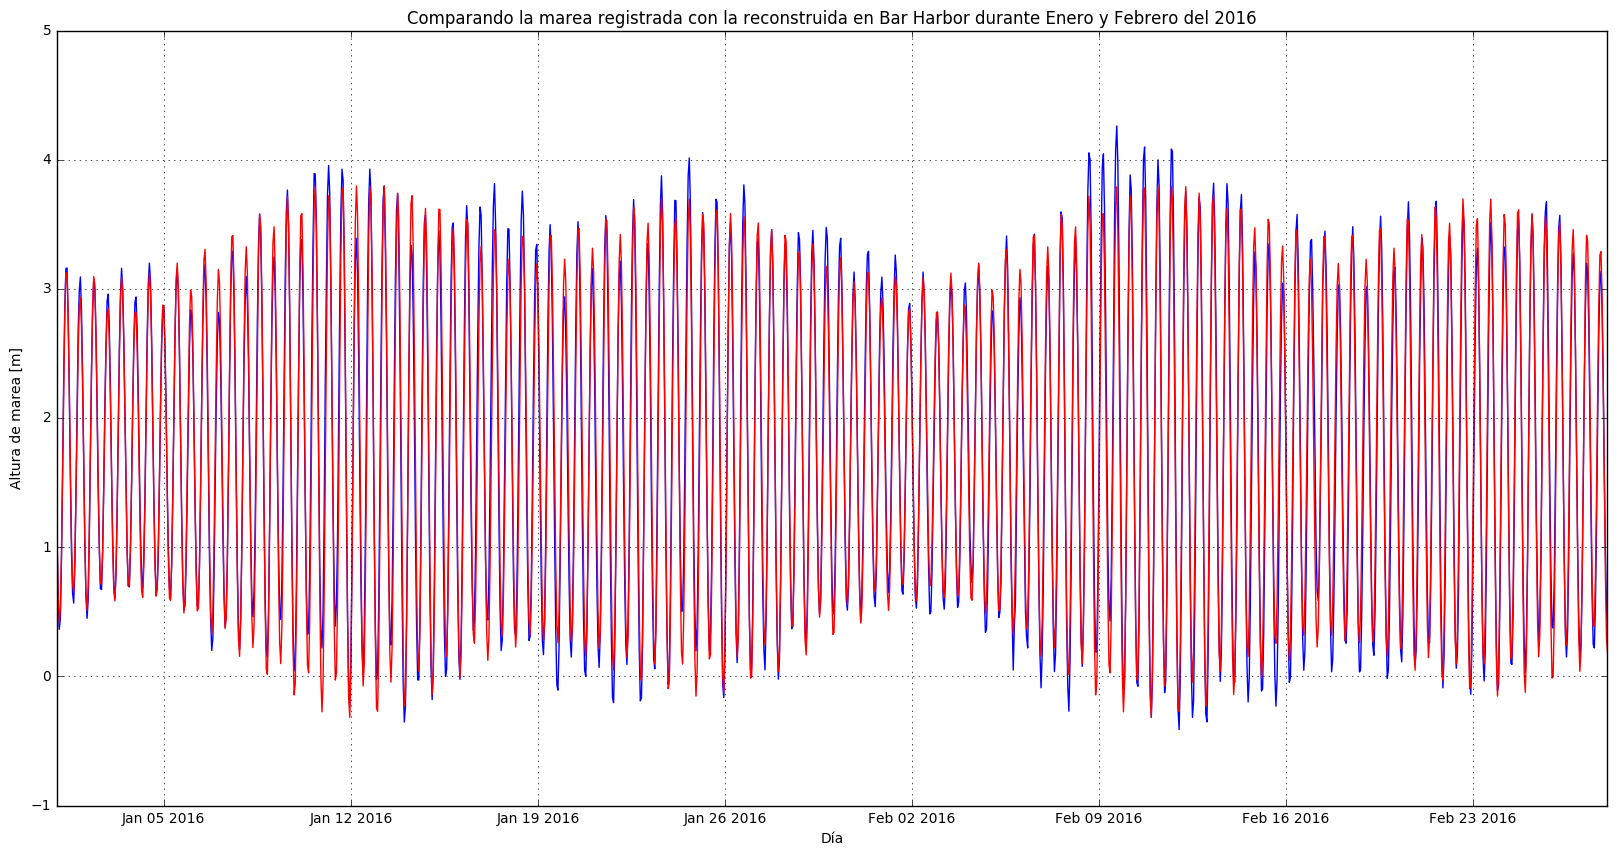

In [33]:
import matplotlib.pyplot as plt
plt.plot(df['Date Time'],  df[u'Water Level'], 'b-', label='Altura')
plt.plot(df['Date Time'], f(df['Hora']), 'r-', label='Altura recosntruida')
plt.xlim(pd.Timestamp('2016-01-01 00:00:00'), pd.Timestamp('2016-02-28 00:23:00'))
plt.ylabel('Altura de marea [m]')
plt.xlabel('Día')
plt.title('Comparando la marea registrada con la reconstruida en Bar Harbor durante Enero y Febrero del 2016')
plt.grid(True) 

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [32]:
Error = sum(abs(y-f(df['Hora']))**2) / sum(abs(y)**2)
Error

0.010390260387641036